## Import libraries and SVHN dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
])

train_dataset = datasets.SVHN(root='./data', split='train', transform=transform, download=True)
test_dataset = datasets.SVHN(root='./data', split='test', transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

Using downloaded and verified file: ./data\train_32x32.mat
Using downloaded and verified file: ./data\test_32x32.mat


## Architecture and def forward

In [2]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)  
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  

    def forward(self, x):
        x = torch.nn.functional.tanh(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = torch.nn.functional.tanh(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = torch.flatten(x, start_dim=1)
        x = torch.nn.functional.tanh(self.fc1(x))
        x = torch.nn.functional.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

## Model, functional loss, optimizer and training

In [3]:
model = LeNet5()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):

    train_running_loss = 0.0
    train_running_corrects = 0
    train_samples = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        train_outputs = model(images)
        loss = criterion(train_outputs, labels)
        loss.backward()
        optimizer.step()

        _, train_predicted = torch.max(train_outputs, 1)
        train_running_loss += loss.item() * images.size(0)
        train_running_corrects += torch.sum(train_predicted == labels.data)
        train_samples += labels.size(0)

    train_epoch_loss = train_running_loss / train_samples
    train_epoch_accuracy = 100.0 * train_running_corrects / train_samples
    
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_epoch_loss:.4f}, Train Accuracy: {train_epoch_accuracy:.2f}%")

    test_running_loss = 0.0
    test_running_corrects = 0
    test_samples = 0

    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            test_outputs = model(images)
            _, test_predicted = torch.max(test_outputs, 1)
            loss = criterion(test_outputs, labels)
            test_running_loss += loss.item() * images.size(0)
            test_running_corrects += torch.sum(test_predicted == labels.data)
            test_samples += labels.size(0)

    test_epoch_loss = test_running_loss / test_samples
    test_epoch_accuracy = 100.0 * test_running_corrects / test_samples
    
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Test Loss: {test_epoch_loss:.4f}, Test Accuracy: {test_epoch_accuracy:.2f}%")

    train_losses.append(train_epoch_loss)
    test_losses.append(test_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    test_accuracies.append(test_epoch_accuracy)
    
print(f'Total Test Accuracy: {test_accuracies[-1]:.2f}%')

Epoch [1/10] - Train Loss: 1.4627, Train Accuracy: 50.23%
Epoch [1/10] - Test Loss: 0.7198, Test Accuracy: 77.82%
Epoch [2/10] - Train Loss: 0.5524, Train Accuracy: 83.40%
Epoch [2/10] - Test Loss: 0.5488, Test Accuracy: 83.58%
Epoch [3/10] - Train Loss: 0.4555, Train Accuracy: 86.40%
Epoch [3/10] - Test Loss: 0.5343, Test Accuracy: 83.95%
Epoch [4/10] - Train Loss: 0.4040, Train Accuracy: 87.91%
Epoch [4/10] - Test Loss: 0.4964, Test Accuracy: 85.05%
Epoch [5/10] - Train Loss: 0.3704, Train Accuracy: 88.94%
Epoch [5/10] - Test Loss: 0.4300, Test Accuracy: 87.37%
Epoch [6/10] - Train Loss: 0.3449, Train Accuracy: 89.64%
Epoch [6/10] - Test Loss: 0.4354, Test Accuracy: 86.97%
Epoch [7/10] - Train Loss: 0.3227, Train Accuracy: 90.49%
Epoch [7/10] - Test Loss: 0.4415, Test Accuracy: 87.22%
Epoch [8/10] - Train Loss: 0.3048, Train Accuracy: 90.83%
Epoch [8/10] - Test Loss: 0.4210, Test Accuracy: 87.27%
Epoch [9/10] - Train Loss: 0.2885, Train Accuracy: 91.31%
Epoch [9/10] - Test Loss: 0.40

## Results

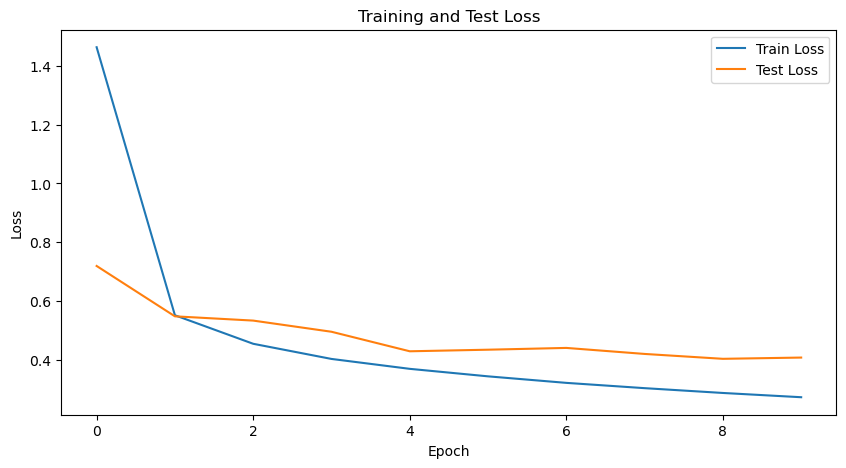

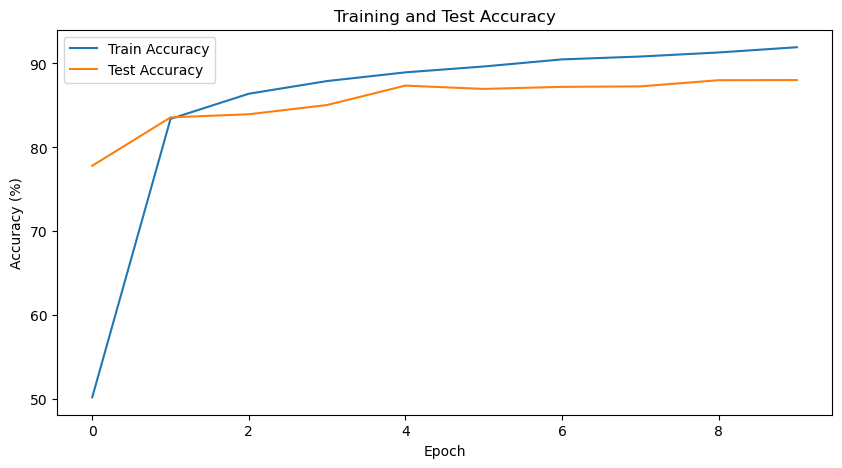

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
